In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Social_Network_Ads (2)-Copy1.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [6]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
## preprocessing

In [8]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
data.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [10]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
df = pd.get_dummies(data['Gender'],drop_first=True)

In [12]:
data.drop(columns=['Gender'],inplace=True)

In [13]:
dataframe = pd.concat([df,data],axis=1)

In [14]:
dataframe.head()

,Male,User ID,Age,EstimatedSalary,Purchased
0,1,15624510,19,19000,0
1,1,15810944,35,20000,0
2,0,15668575,26,43000,0
3,0,15603246,27,57000,0
4,1,15804002,19,76000,0


In [15]:
dataframe.drop(columns=['User ID'],inplace=True)

In [16]:
x = dataframe.drop(columns=['Purchased'])
y = dataframe['Purchased']

In [17]:
x.shape,y.shape

((400, 3), (400,))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report,accuracy_score

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,stratify=y,random_state=0)

In [20]:
x_train.shape,y_train.shape

((320, 3), (320,))

In [21]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.9


In [22]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[48,  3],
       [ 5, 24]], dtype=int64)

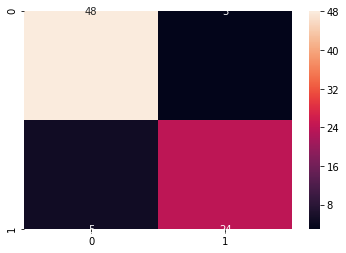

In [23]:
sns.heatmap(mat,fmt='d',annot=True)
plt.show()

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.89      0.83      0.86        29

    accuracy                           0.90        80
   macro avg       0.90      0.88      0.89        80
weighted avg       0.90      0.90      0.90        80



In [25]:
model.predict([[1,30,30000]])

array([0], dtype=int64)

In [26]:
data1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data1.head()

,Actual,Predicted
361,1,1
245,1,1
313,1,1
294,0,0
376,0,0


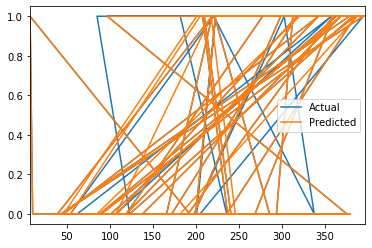

In [27]:
data1.plot()

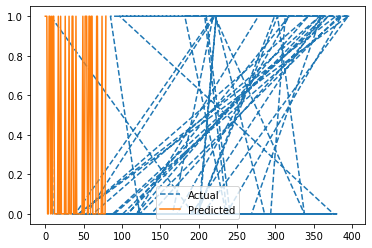

In [28]:
plt.plot(y_test,linestyle='--',label='Actual')
plt.plot(y_pred,label='Predicted')
plt.legend(loc=8)
plt.show()

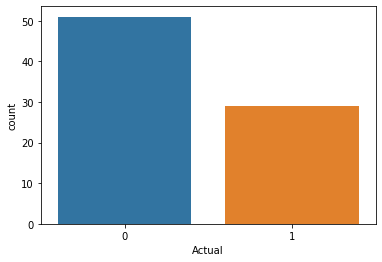

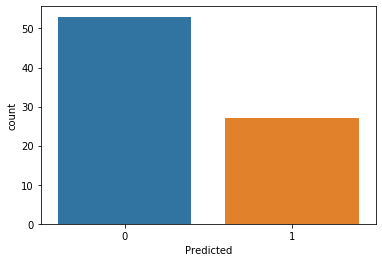

In [29]:
sns.countplot(data1['Actual'])
plt.show()
sns.countplot(data1['Predicted'])
plt.show()

In [30]:
x_train.shape,y_train.shape

((320, 3), (320,))

In [31]:
y_train.value_counts()

0    206
1    114
Name: Purchased, dtype: int64

In [32]:
print('Value of o in y_train before oversampling :-',y_train.value_counts()[0])
print('Value of 1 in y_train before oversampling :-',y_train.value_counts()[1])

Value of o in y_train before oversampling :- 206
Value of 1 in y_train before oversampling :- 114


In [33]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [34]:
sm = SMOTE(sampling_strategy=1,random_state=42,n_jobs=-1,k_neighbors=5)

In [35]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [36]:
x_train_res,y_train_res = sm.fit_sample(x_train,y_train.ravel())

In [37]:
model = DecisionTreeClassifier()
model.fit(x_train_res,y_train_res)
y_predi= model.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_predi))

Accuracy : 0.8875


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.89      0.83      0.86        29

    accuracy                           0.90        80
   macro avg       0.90      0.88      0.89        80
weighted avg       0.90      0.90      0.90        80



In [52]:
print('Accuarcy of training data :-',model.score(x_train_res,y_train_res))
print('Accuarcy of testing data :-',model.score(x_test,y_test))

Accuarcy of training data :- 0.9830097087378641
Accuarcy of testing data :- 0.8875


### CRoss validation behaviour.

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
val_score_mean = cross_val_score(model,x_train_res,y_train_res,cv=10).mean()*100
val_score_mean

88.33914053426248

In [64]:
val_score_max = cross_val_score(model,x_train_res,y_train_res,cv=10).max()*100
val_score_max

95.23809523809523

In [67]:
val_score_min = cross_val_score(model,x_train_res,y_train_res,cv=10).min()*100
val_score_min

83.33333333333334

In [68]:
sqrt_error= np.sqrt(mean_squared_error(y_test,y_predi))
sqrt_error

0.33541019662496846

In [69]:
np.std(y_test)

0.4807221130757352

- HERE WE Can say the standard deviation of the actual value is greter than error occure due the classification.That means our model is good model.

### AUC-ROC Curve.

In [53]:
from plotnine import aes,geom_area,geom_abline,geom_line,ggplot,ggtitle

In [55]:
from sklearn.metrics import auc,roc_curve

In [54]:
probab=model.predict_proba(x_test)[:,1]

In [56]:
fpr,tpr,thresh = roc_curve(y_test,probab)

In [57]:
roc_data = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [58]:
auc= round(auc(fpr,tpr),1)

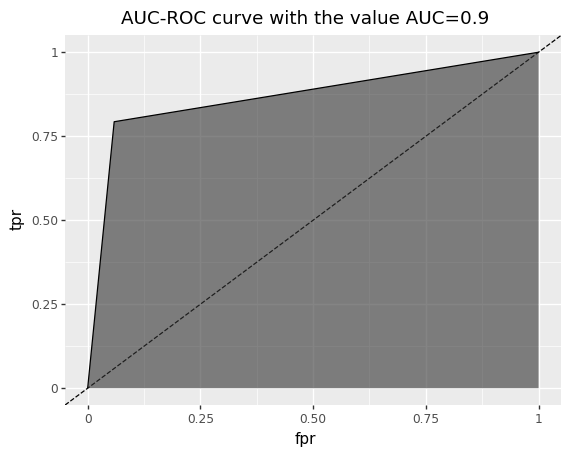

<ggplot: (18664927)>

In [59]:
ggplot(roc_data,aes(x='fpr',y='tpr'))+geom_abline(linetype='dashed')+geom_area(alpha=0.6)+geom_line()+ggtitle('AUC-ROC curve with the value AUC={}'.format(auc))

# RandomForest Algorithm

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [73]:
classifier = RandomForestClassifier()

In [74]:
from scipy.stats import randint

In [76]:
params = {'n_estimators':randint(100,400),'criterion':['gini','entropy'],'min_samples_leaf':randint(1,5)}

In [77]:
clf_cv = RandomizedSearchCV(classifier,params,n_iter=10,cv=10)

In [78]:
clf_cv.fit(x_train_res,y_train_res)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [79]:
clf_cv.best_params_

{'criterion': 'gini', 'min_samples_leaf': 3, 'n_estimators': 317}

In [82]:
clf_cv.best_score_

0.9319396051103368

In [83]:
Y_predict=clf_cv.predict(x_test)

In [84]:
mat =confusion_matrix(y_test,Y_predict)
mat

array([[47,  4],
       [ 4, 25]], dtype=int64)

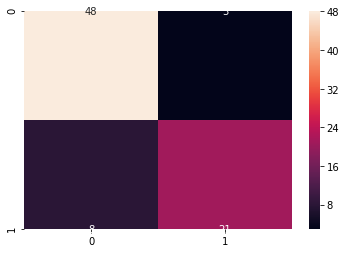

In [42]:
sns.heatmap(mat,fmt='d',annot=True)
plt.show()

In [86]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        51
           1       0.86      0.86      0.86        29

    accuracy                           0.90        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [88]:
sqrt_err=np.sqrt(mean_squared_error(y_test,Y_predict))
sqrt_err

0.31622776601683794

In [89]:
np.std(y_test)

0.4807221130757352

- Since we are getting the sqrt error lesser than the standard deviation of actual.That's means our model is good enough.

## To get the more information regarding to regarding to the our  model whether model overfitted or not.

In [90]:
print('Accuarcy of training data :-',clf_cv.score(x_train_res,y_train_res))
print('Accuarcy of testing data :-',clf_cv.score(x_test,y_test))

Accuarcy of training data :- 0.9466019417475728
Accuarcy of testing data :- 0.9


- Since model train on each and every data and predict outof which 94 % data that means our model good in training as well as if we see the model testing accuaracy got increasing upto 90%.Since it is lesser than the training data that's means our model is  bit overfitted.

### AUC_ROC Curve.

In [92]:
from sklearn.metrics import roc_curve,auc
from plotnine import aes,geom_abline,geom_area,geom_line,ggplot,ggtitle

In [96]:
probablities=clf_cv.predict_proba(x_test)[:,1]

In [97]:
fpr,tpr,thresh=roc_curve(y_test,probablities)

In [98]:
roc_data = pd.DataFrame(dict(tpr=tpr,fpr=fpr))

In [99]:
auc = round(auc(fpr,tpr),1)

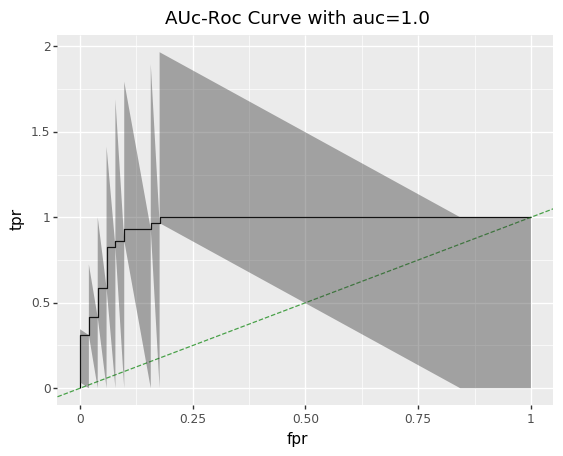

<ggplot: (21064715)>

In [102]:
ggplot(roc_data,aes(x='fpr',y='tpr'))+geom_line()+geom_abline(linetype='dashed',color='green',alpha=0.7)+geom_area(alpha=0.4)+ggtitle('AUc-Roc Curve with auc={}'.format(auc))

### Thank You..!!